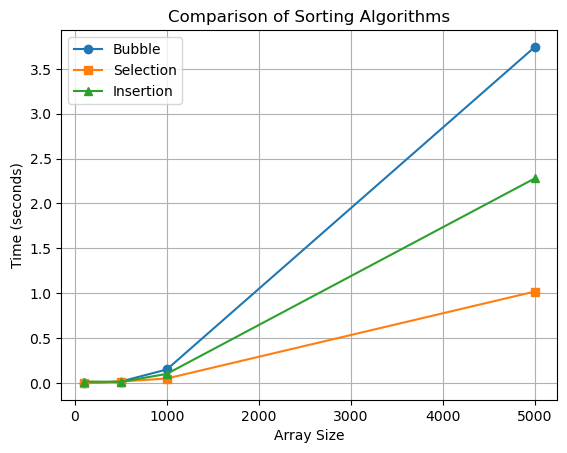

In [1]:
import time
import matplotlib.pyplot as plt

def bubble(arr):
    length = len(arr)
    for i in range(length):
        for j in range(0, length-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

def selection(arr):
    length = len(arr)
    for i in range(length):
        min_index = i
        for j in range(i+1, length):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]
    return arr

def insertion(arr):
    length = len(arr)
    for i in range(1, length):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr

def time_sorting_function(sort_func, array):
    start = time.time()
    sort_func(array.copy())  
    return time.time() - start

input_sizes = [100, 500, 1000, 5000]
bubble_sort_times, selection_sort_times, insertion_sort_times = [], [], []

for size in input_sizes:
    data = list(range(size, 0, -1)) 
    bubble_sort_times.append(time_sorting_function(bubble, data))
    selection_sort_times.append(time_sorting_function(selection, data))
    insertion_sort_times.append(time_sorting_function(insertion, data))

plt.plot(input_sizes, bubble_sort_times, label="Bubble", marker="o")
plt.plot(input_sizes, selection_sort_times, label="Selection", marker="s")
plt.plot(input_sizes, insertion_sort_times, label="Insertion", marker="^")
plt.xlabel("Array Size")
plt.ylabel("Time (seconds)")
plt.title("Comparison of Sorting Algorithms")
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import random
import time

def quick_sort_algorithm(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]  
    left_part = [x for x in arr if x < pivot]
    middle_part = [x for x in arr if x == pivot]
    right_part = [x for x in arr if x > pivot]
    return quick_sort_algorithm(left_part) + middle_part + quick_sort_algorithm(right_part)

def merge_sort_algorithm(arr):
    if len(arr) <= 1:
        return arr
    half = len(arr) // 2
    left_subarray = merge_sort_algorithm(arr[:half])
    right_subarray = merge_sort_algorithm(arr[half:])
    return merge_arrays(left_subarray, right_subarray)

def merge_arrays(left, right):
    merged_result = []
    left_pointer = right_pointer = 0
    while left_pointer < len(left) and right_pointer < len(right):
        if left[left_pointer] < right[right_pointer]:
            merged_result.append(left[left_pointer])
            left_pointer += 1
        else:
            merged_result.append(right[right_pointer])
            right_pointer += 1
    merged_result.extend(left[left_pointer:])
    merged_result.extend(right[right_pointer:])
    return merged_result

def generate_random_numbers(size):
    return [random.randint(0, 100000) for _ in range(size)]

def performance_comparison():
    sizes_to_test = [1000, 5000, 10000]
    for size in sizes_to_test:
        data = generate_random_numbers(size)
        
        start_time = time.time()
        quick_sort_algorithm(data)
        quick_duration = time.time() - start_time
        
        start_time = time.time()
        merge_sort_algorithm(data)
        merge_duration = time.time() - start_time
        
        print(f"Array Size: {size} | Quick Sort: {quick_duration:.6f} seconds | Merge Sort: {merge_duration:.6f} seconds")

performance_comparison()

Array Size: 1000 | Quick Sort: 0.004998 seconds | Merge Sort: 0.004998 seconds
Array Size: 5000 | Quick Sort: 0.048535 seconds | Merge Sort: 0.039979 seconds
Array Size: 10000 | Quick Sort: 0.048653 seconds | Merge Sort: 0.046871 seconds


In [3]:
import random
import time

def heapify_tree(arr, n, root):
    largest = root
    left_child = 2 * root + 1
    right_child = 2 * root + 2

    if left_child < n and arr[left_child] > arr[largest]:
        largest = left_child

    if right_child < n and arr[right_child] > arr[largest]:
        largest = right_child

    if largest != root:
        arr[root], arr[largest] = arr[largest], arr[root]
        heapify_tree(arr, n, largest)

def sort_using_heap(arr):
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify_tree(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify_tree(arr, i, 0)

    return arr

def sort_using_counting(arr):
    if not arr:
        return arr
    
    max_element = max(arr)
    frequency = [0] * (max_element + 1)
    final_sorted_array = [0] * len(arr)

    for number in arr:
        frequency[number] += 1

    for i in range(1, len(frequency)):
        frequency[i] += frequency[i - 1]

    for number in reversed(arr):
        final_sorted_array[frequency[number] - 1] = number
        frequency[number] -= 1

    return final_sorted_array

def create_random_array(size, upper_limit=1000):
    return [random.randint(0, upper_limit) for _ in range(size)]

def analyze_sorting_performance():
    test_sizes = [1000, 5000, 10000]

    for size in test_sizes:
        arr = create_random_array(size)

        start_time = time.time()
        sort_using_heap(arr.copy())
        heap_sort_duration = time.time() - start_time

        start_time = time.time()
        sort_using_counting(arr.copy())
        counting_sort_duration = time.time() - start_time

        print(f"Array Size: {size} | Heap Sort Time: {heap_sort_duration:.6f} sec | Counting Sort Time: {counting_sort_duration:.6f} sec")

analyze_sorting_performance()

Array Size: 1000 | Heap Sort Time: 0.006995 sec | Counting Sort Time: 0.001003 sec
Array Size: 5000 | Heap Sort Time: 0.040386 sec | Counting Sort Time: 0.002145 sec
Array Size: 10000 | Heap Sort Time: 0.064058 sec | Counting Sort Time: 0.015643 sec
